In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [103]:
markets_df = pd.read_csv('/Users/catherinefuller/galvanize/daimil10/projects/Mid_Term/Myanmar_Food/data/wfp_food_prices_mmr 2.csv')

In [104]:
#Remove first row
markets_df.drop(index=markets_df.index[0], axis=0, inplace=True)

In [105]:
markets_df.tail()
markets_df.value_counts('admin1')


admin1
Rakhine         7687
Shan (North)    7539
Kachin          5614
Chin            3440
Magway          2693
Yangon          1434
Sagaing         1301
Shan (South)    1088
Mon              842
Mandalay         823
Kayin            727
Tanintharyi      564
Kayah            271
Shan (East)      172
Name: count, dtype: int64

In [106]:
markets_df.value_counts('market')

market
Lashio Market            796
Buthidaung               594
Manton                   567
Momauk                   564
Pakokku Myo Ma Market    560
                        ... 
Kan Htaunt Camp            5
Kawt Dut                   5
Thet Yet Pin Chaung        5
88 ward                    5
Jaw Masat                  1
Name: count, Length: 231, dtype: int64

In [8]:
#Find out over how many months data was collected
y = 13
m = 12
y * m

156

In [107]:
#Clean Data- Convert time to Datetime

markets_df['date'] = pd.to_datetime(markets_df['date'])

In [108]:
#Clean Date - Convert the price columns to float
markets_df['price'] = markets_df['price'].astype(float).round(2)
markets_df['usdprice'] = markets_df['usdprice'].astype(float).round(2)

In [109]:
markets_df.rename(columns = {'admin1':'region', 'admin2':'subregion'}, inplace = True)
markets_df.head()

,date,region,subregion,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,cereals and tubers,Rice (low quality),KG,actual,Retail,MMK,400.00,63.08
2,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (chicken),KG,actual,Retail,MMK,3636.36,573.44
3,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (pork),KG,actual,Retail,MMK,3636.36,573.44
4,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Onions,KG,actual,Retail,MMK,969.70,152.92
5,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Tomatoes,KG,actual,Retail,MMK,484.85,76.46


Text(0.5, 1.0, 'Market Regions')

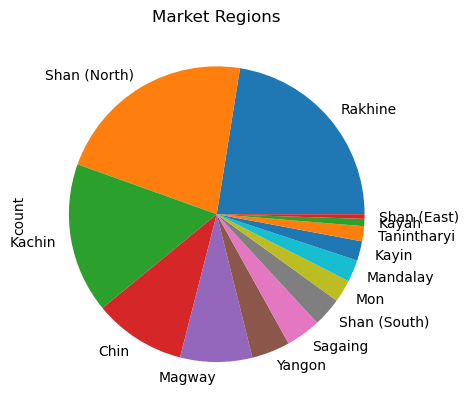

In [136]:
markets_df['region'].value_counts().plot.pie()
plt.title("Market Regions")

In [111]:
#Filter out markets with under 100 data points

#top_markets = markets_df.value_counts('market') > 99
market_mask = markets_df['market'].value_counts()
top_marks = markets_df[markets_df['market'].isin(market_mask.index[market_mask>150])]

top_marks.head()

,date,region,subregion,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,cereals and tubers,Rice (low quality),KG,actual,Retail,MMK,400.00,63.08
2,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (chicken),KG,actual,Retail,MMK,3636.36,573.44
3,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (pork),KG,actual,Retail,MMK,3636.36,573.44
4,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Onions,KG,actual,Retail,MMK,969.70,152.92
5,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Tomatoes,KG,actual,Retail,MMK,484.85,76.46


In [34]:
# market_idx = top_marks.groupby('market')['usdprice'].sum()
# market_idx

market
Ah Nauk Pyin       242.79
Ah Nauk Ywe        202.06
Ahpauk Wa          182.90
Ai Cheng           407.89
Ba Yint Naung      164.02
                   ...   
Yebyu Market       186.57
Yenanchaung      16814.05
Ying Phan          351.42
Zay Cho            149.70
Zedi Pyin        19220.02
Name: usdprice, Length: 92, dtype: float64

In [141]:
#Find top markets with highest commodity prices
commodity_mark = top_marks[['market','subregion','commodity','usdprice','date']]

#Let's find onions first
#Filter the dataframe to only list onions
top_onions = (commodity_mark['commodity'] == 'Onions') | (commodity_mark['commodity'] == 'Onions (local)')
high_onions = commodity_mark[top_onions]
high_onions.head(20)

#Find the top unique markets that had the highest ever onion prices
top_onion_markets = high_onions.groupby('market').usdprice.max().sort_values(ascending=False)
top_ten_onion = top_onion_markets.iloc[:10]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Long Tan'),
  Text(1, 0, 'Sadung'),
  Text(2, 0, 'Pang Kham'),
  Text(3, 0, 'Pang Yang'),
  Text(4, 0, 'Gangaw'),
  Text(5, 0, 'Kaung Ming Sang'),
  Text(6, 0, 'Manton'),
  Text(7, 0, 'Man Pan'),
  Text(8, 0, 'Wai Maw'),
  Text(9, 0, 'Lashio Market')])

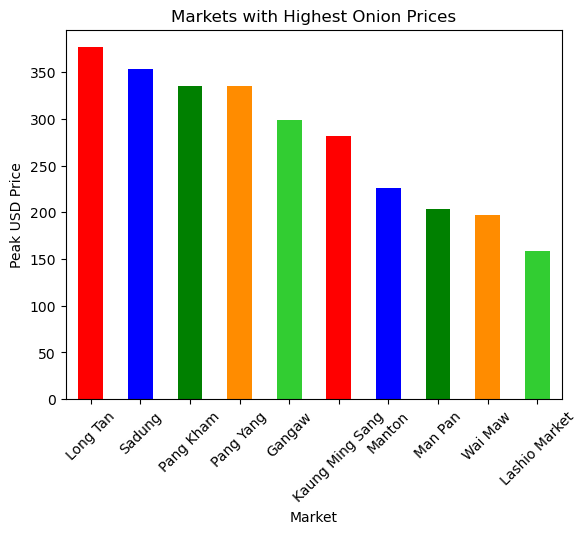

In [127]:
#Onion Graphs

high_onions.groupby('market').usdprice.max().sort_values(ascending=False)[:10].plot.bar(color=['red', 'blue', 'green','darkorange','limegreen'])
plt.title('Markets with Highest Onion Prices')
plt.xlabel("Market")
plt.ylabel('Peak USD Price')
plt.xticks(rotation=45)

In [142]:
#Find top markets with highest commodity prices
commodity_mark = top_marks[['market','subregion','commodity','usdprice','date']]

#Let's find fuel second
#Filter the dataframe to only list onions
top_fuel = (commodity_mark['commodity'] == 'Fuel (diesel)') 
high_fuel = commodity_mark[top_fuel]
high_fuel.head(20)

#Find the top unique markets that had the highest ever fuel prices
top_fuel_markets = high_fuel.groupby('market').usdprice.max().sort_values(ascending=False)
top_ten_fuel = top_fuel_markets.iloc[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mansi'),
  Text(1, 0, 'Momauk'),
  Text(2, 0, 'Shwegu'),
  Text(3, 0, 'Wai Maw'),
  Text(4, 0, 'Bhamo'),
  Text(5, 0, 'Ai Cheng'),
  Text(6, 0, 'Pang Yang'),
  Text(7, 0, 'Buthidaung'),
  Text(8, 0, 'Wang Leng'),
  Text(9, 0, 'Laukkaing')])

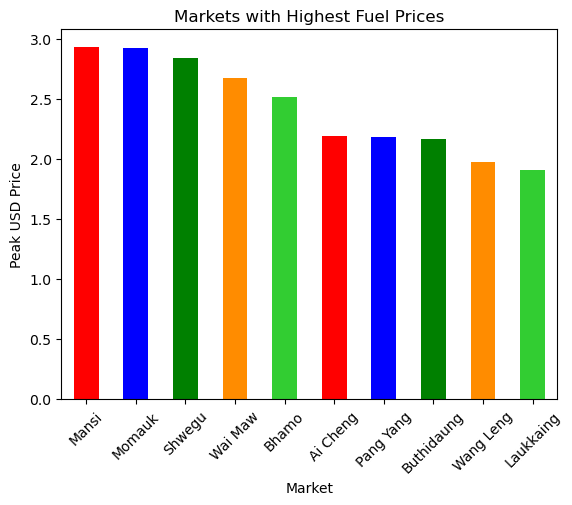

In [130]:
#Fuel Graphs

high_fuel.groupby('market').usdprice.max().sort_values(ascending=False)[:10].plot.bar(color=['red', 'blue', 'green','darkorange','limegreen'])
plt.title('Markets with Highest Fuel Prices')
plt.xlabel("Market")
plt.ylabel('Peak USD Price')
plt.xticks(rotation=45)

In [143]:
#Find top markets with highest commodity prices
commodity_mark = top_marks[['market','subregion','commodity','usdprice','date']]

#Now lets find palm oil
#Filter the dataframe to only list oil
top_oil = (commodity_mark['commodity'] == 'Oil (palm)') 
high_oil = commodity_mark[top_oil]

#Find the top unique markets that had the highest ever onion prices
top_oil_markets = high_oil.groupby('market').usdprice.max().sort_values(ascending=False)
top_ten_oil = top_oil_markets.iloc[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Zedi Pyin'),
  Text(1, 0, 'Hakha Myoma Market'),
  Text(2, 0, 'Momauk'),
  Text(3, 0, 'Manton'),
  Text(4, 0, 'Man Pan'),
  Text(5, 0, 'Tonzang'),
  Text(6, 0, 'Taung Bazzar'),
  Text(7, 0, 'Gangaw'),
  Text(8, 0, 'Nyaung Chung'),
  Text(9, 0, 'Maungdaw')])

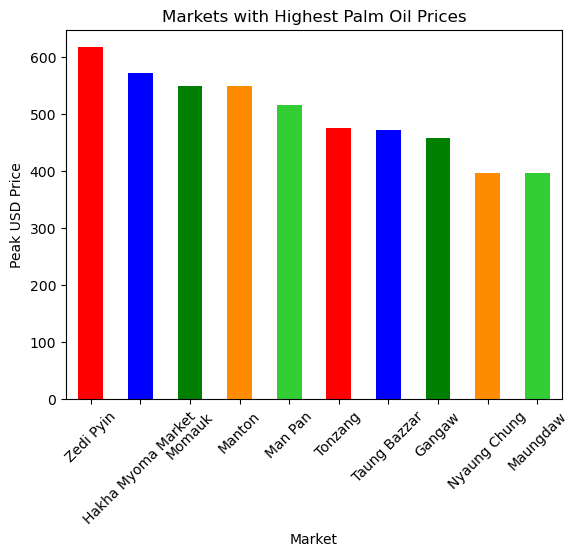

In [132]:
#Oil Graphs

high_oil.groupby('market').usdprice.max().sort_values(ascending=False)[:10].plot.bar(color=['red', 'blue', 'green','darkorange','limegreen'])
plt.title('Markets with Highest Palm Oil Prices')
plt.xlabel("Market")
plt.ylabel('Peak USD Price')
plt.xticks(rotation=45)

In [144]:
#Find top markets with highest commodity prices
commodity_mark = top_marks[['market','subregion','commodity','usdprice','date']]

#Now lets find rice
#Filter the dataframe to only list rice
top_rice = (commodity_mark['commodity'] == 'Rice (low quality)') 
high_rice = commodity_mark[top_rice]

#Find the top unique markets that had the highest ever onion prices
top_rice_markets = high_rice.groupby('market').usdprice.max().sort_values(ascending=False)
top_ten_rice = top_rice_markets.iloc[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Matupi'),
  Text(1, 0, 'Manton'),
  Text(2, 0, 'Magway'),
  Text(3, 0, 'Yenanchaung'),
  Text(4, 0, 'Pang Kham'),
  Text(5, 0, 'Man Pan'),
  Text(6, 0, 'Lashio Market'),
  Text(7, 0, 'Pang Yang'),
  Text(8, 0, 'Kaung Ming Sang'),
  Text(9, 0, 'Sadung')])

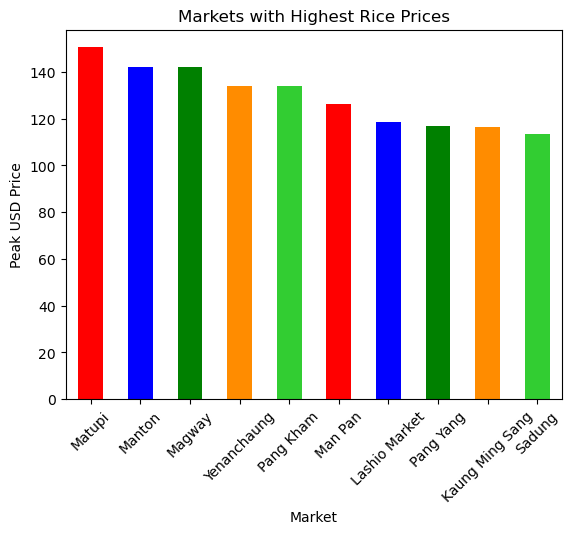

In [139]:
#Rice Graphs

high_rice.groupby('market').usdprice.max().sort_values(ascending=False)[:10].plot.bar(color=['red', 'blue', 'green','darkorange','limegreen'])
plt.title('Markets with Highest Rice Prices')
plt.xlabel("Market")
plt.ylabel('Peak USD Price')
plt.xticks(rotation=45)

In [160]:
#Find top markets with highest commodity prices
commodity_mark = top_marks[['market','subregion','commodity','usdprice','date']]

#Now lets find rice
#Filter the dataframe to only list rice
top_meat = (commodity_mark['commodity'] == 'Meat (pork)') 
high_meat = commodity_mark[top_meat]

#Find the top unique markets that had the highest ever onion prices
top_meat_markets = high_meat.groupby('market').usdprice.max().sort_values(ascending=False)
top_ten_meat = top_meat_markets.iloc[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Taunggyi'),
  Text(1, 0, 'Hakha Myoma Market'),
  Text(2, 0, 'Hsihseng'),
  Text(3, 0, 'Magway'),
  Text(4, 0, 'Wai Maw'),
  Text(5, 0, 'Lashio Market'),
  Text(6, 0, 'Momauk'),
  Text(7, 0, 'Yenanchaung'),
  Text(8, 0, 'Maungdaw'),
  Text(9, 0, 'Gangaw')])

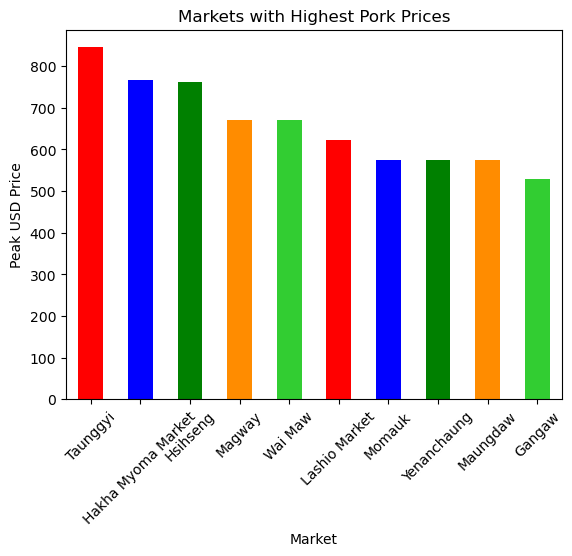

In [161]:
#Meat Graphs

high_meat.groupby('market').usdprice.max().sort_values(ascending=False)[:10].plot.bar(color=['red', 'blue', 'green','darkorange','limegreen'])
plt.title('Markets with Highest Pork Prices')
plt.xlabel("Market")
plt.ylabel('Peak USD Price')
plt.xticks(rotation=45)

In [169]:
#Turn top market names into a separate data frame
rice_lst = list(top_ten_rice.index.values)
onion_lst = list(top_ten_onion.index.values)
fuel_lst = list(top_ten_fuel.index.values)
oil_lst = list(top_ten_oil.index.values)
meat_lst = list(top_ten_meat.index.values)

market_lst = rice_lst + onion_lst + fuel_lst + oil_lst + meat_lst

vuln_markets = pd.DataFrame(market_lst)
vuln_markets['market'] = vuln_markets[0]
print(vuln_markets.value_counts('market'))

#Find markets that appear more than once on the combined list
vuln_market_mask = vuln_markets['market'].value_counts()
top_vuln_marks = vuln_markets[vuln_markets['market'].isin(vuln_market_mask.index[vuln_market_mask>2])]

top_vuln_marks.index



market
Pang Yang             3
Gangaw                3
Momauk                3
Manton                3
Lashio Market         3
Wai Maw               3
Man Pan               3
Sadung                2
Pang Kham             2
Maungdaw              2
Magway                2
Kaung Ming Sang       2
Hakha Myoma Market    2
Yenanchaung           2
Tonzang               1
Taunggyi              1
Taung Bazzar          1
Wang Leng             1
Shwegu                1
Ai Cheng              1
Matupi                1
Nyaung Chung          1
Bhamo                 1
Mansi                 1
Long Tan              1
Laukkaing             1
Hsihseng              1
Buthidaung            1
Zedi Pyin             1
Name: count, dtype: int64


Index([1, 5, 6, 7, 13, 14, 16, 17, 18, 19, 21, 23, 26, 32, 33, 34, 37, 44, 45,
       46, 49],
      dtype='int64')

Text(0.5, 1.0, 'Top Markets in Myanmar with Volatile Price Surges')

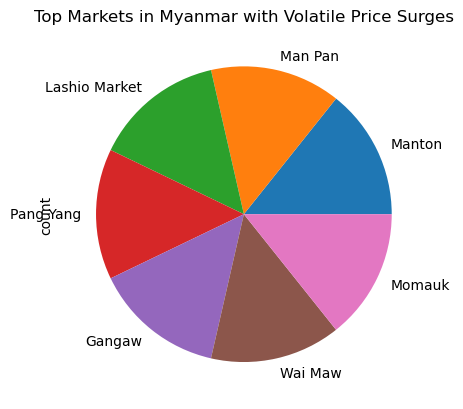

In [166]:
top_vuln_marks['market'].value_counts().plot.pie()
plt.title("Top Markets in Myanmar with Volatile Price Surges")